In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [13]:

# Sample data
df = pd.DataFrame({
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'sales': [150, 200, 180, 220, 250]
})

df


,month,sales
0,Jan,150
1,Feb,200
2,Mar,180
3,Apr,220
4,May,250


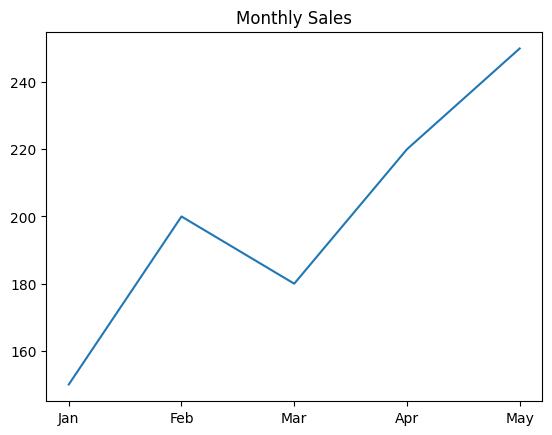

In [14]:
# Implicit: pyplot creates figure and axes behind the scenes
plt.plot(df['month'], df['sales'])
plt.title('Monthly Sales')
plt.show()


**What’s happening behind the scenes:**

- `plt.plot()` creates a figure and axes automatically
- You’re using a “state machine” - pyplot tracks the “current” figure/axes
- Fine for quick exploration, but limits control

Text(0.5, 1.0, 'Sales plotting')

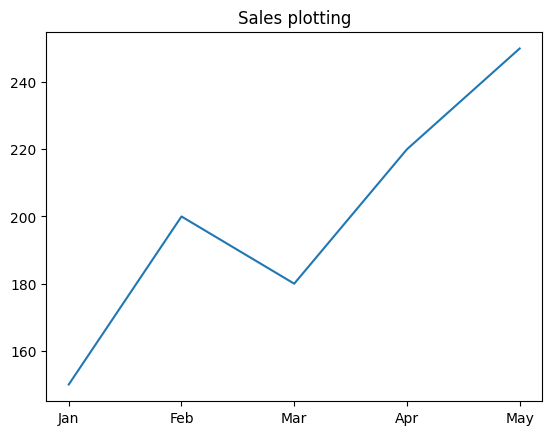

In [15]:
x = df['month']
y = df['sales']
fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Sales plotting')

**exploring mutiple subplots**

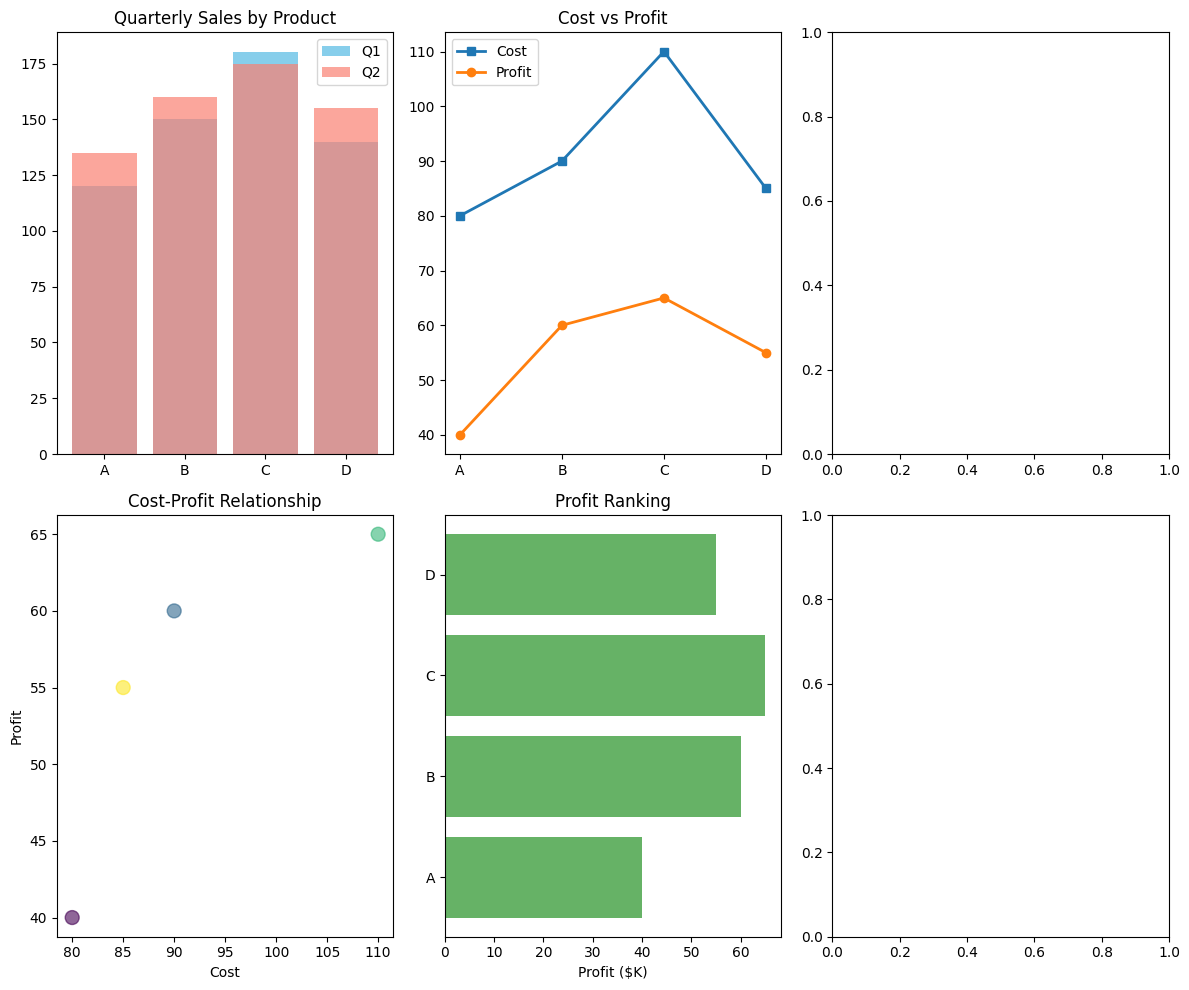

In [16]:
# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
# axes is now a 2D numpy array: axes[row, col]

# Different data for demonstration
products = ['A', 'B', 'C', 'D']
q1_sales = [120, 150, 180, 140]
q2_sales = [135, 160, 175, 155]
costs = [80, 90, 110, 85]
profit = [40, 60, 65, 55]

# Top-left: Bar chart
axes[0, 0].bar(products, q1_sales, color='skyblue', label='Q1')
axes[0, 0].bar(products, q2_sales, color='salmon', alpha=0.7, label='Q2')
axes[0, 0].set_title('Quarterly Sales by Product')
axes[0, 0].legend()

# Top-right: Line chart
axes[0, 1].plot(products, costs, marker='s', label='Cost', linewidth=2)
axes[0, 1].plot(products, profit, marker='o', label='Profit', linewidth=2)
axes[0, 1].set_title('Cost vs Profit')
axes[0, 1].legend()

# Bottom-left: Scatter
axes[1, 0].scatter(costs, profit, s=100, alpha=0.6, c=range(4), cmap='viridis')
axes[1, 0].set_xlabel('Cost')
axes[1, 0].set_ylabel('Profit')
axes[1, 0].set_title('Cost-Profit Relationship')

# Bottom-right: Horizontal bar
axes[1, 1].barh(products, profit, color='green', alpha=0.6)
axes[1, 1].set_title('Profit Ranking')
axes[1, 1].set_xlabel('Profit ($K)')

plt.tight_layout()  # Critical for multi-panel figures!
plt.show()

 
 **Answer Review**

**Question 1:** ✅ Correct! 
- Implicit uses pyplot's state machine
- Explicit gives you object handles for precise control

**Question 2:** ✅ Perfect!
- Yes, `(3, 2)` = 3 rows × 2 columns = 6 subplots
- `axes[1, 0]` = middle-left (row 1, col 0 - zero-indexed)
- `axes[2, 1].set_title()` = bottom-right

**Question 3:** ✅ Correct concept!
- Small addition: It's not just about customization, but also about **composing complex visualizations** and **maintaining references** to modify plots later (like updating data in a loop or adding annotations after initial creation)

---


## Hands-On Challenge: Build a Sales Dashboard




In [17]:
import pandas as pd
import numpy as np

# Sample sales data
np.random.seed(42)
df = pd.DataFrame({
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] * 3,
    'region': ['North']*6 + ['South']*6 + ['West']*6,
    'sales': np.random.randint(100, 300, 18),
    'costs': np.random.randint(50, 150, 18)
})

df['profit'] = df['sales'] - df['costs']

### Your Task:

Create a **2×2 dashboard** with these requirements:

1. **Top-left:** Line chart showing total sales by month (sum across all regions)
   - Add markers on the line
   - Label axes appropriately
   - Add a grid

2. **Top-right:** Grouped bar chart comparing sales by region for each month
   - Use pandas `.pivot_table()` to reshape data first
   - Different color for each region
   - Add a legend

3. **Bottom-left:** Scatter plot of costs vs. sales (all data points)
   - Color points by region
   - Add axis labels
   - Bonus: Add a diagonal reference line (where cost = sales)

4. **Bottom-right:** Horizontal bar chart showing total profit by region
   - Sort by profit (highest to lowest)
   - Color bars by value (green for positive, red if any negative)

**Additional requirements:**
- Figure size: (14, 10)
- Add an overall title to the entire figure using `fig.suptitle()`
- Use `plt.tight_layout()` to prevent overlap

---

***Hints:***

```python
# Data transformation hint for top-right:
# pivot_data = df.pivot_table(values='sales', index='month', columns='region')

# Diagonal line hint for bottom-left:
# ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5)

# Sorting hint for bottom-right:
# region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=True)
```

Give this a try! Write the complete code, and I'll review:
1. Your data transformations (did you shape data correctly?)
2. Your subplot organization (correct axes usage?)
3. Your customization choices (professional appearance?)
4. Any shortcuts or improvements you could make

Don't worry about perfection—I want to see your thinking process! Post your code when ready.

In [18]:
df


,month,region,sales,costs,profit
0,Jan,North,202,102,100
1,Feb,North,279,51,228
2,Mar,North,192,137,55
3,Apr,North,114,79,35
4,May,North,206,87,119
5,Jun,North,171,51,120
6,Jan,South,288,113,175
7,Feb,South,120,109,11
8,Mar,South,202,70,132
9,Apr,South,221,82,139


In [ ]:
# df['month'] = pd.to_datetime(df['month']).to_period('M')

In [ ]:
g2 = df.pivot_table(df.groupby['region'])

### Task 1

**Top-left:** Line chart showing total sales by month (sum across all regions)
   - Add markers on the line
   - Label axes appropriately
   - Add a grid

Text(0, 0.5, 'Total Sales across each region')

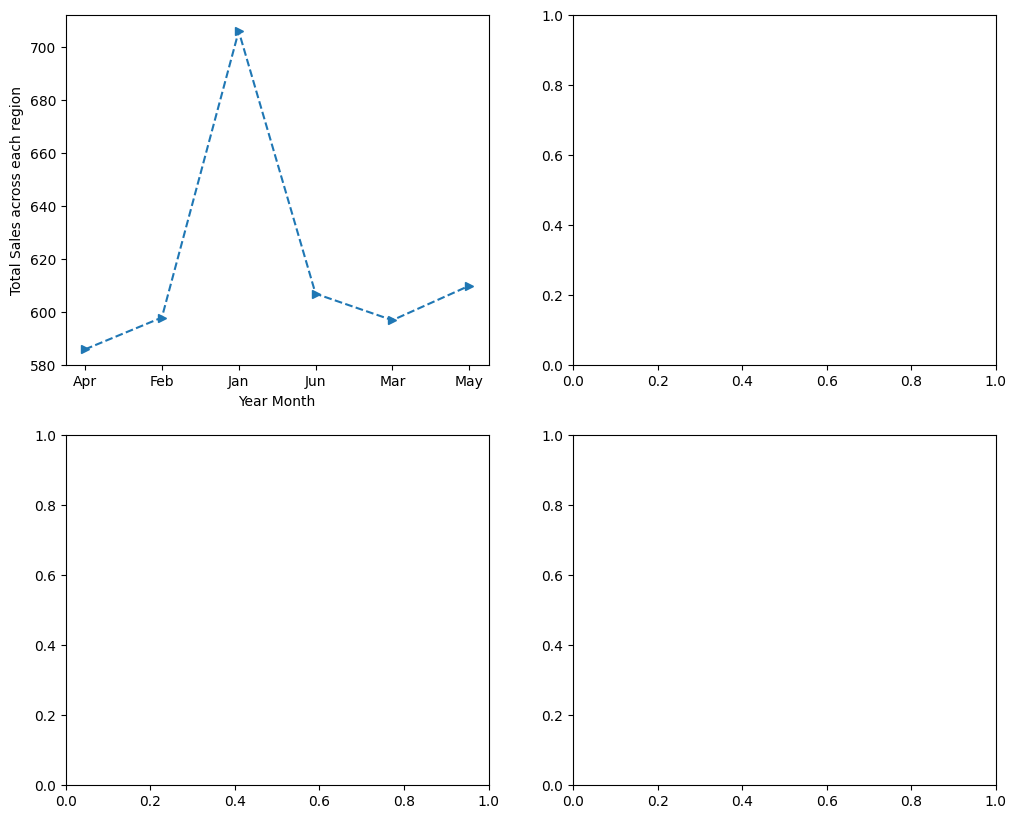

In [ ]:
grouped = df.groupby(by = ['month'])['sales'].sum() # first group sales across regions 

fig, ax = plt.subplots(2,2 ,figsize = (12,10))


top_left = ax[0,0]
top_left.plot(grouped.index,grouped, linestyle ='dashed', marker ='>',)
top_left.set_xlabel('Year Month')
top_left.set_ylabel('Total Sales across each region')
#ax[0,0].set_marker




"""
**Top-right:** Grouped bar chart comparing sales by region for each month
   - Use pandas `.pivot_table()` to reshape data first
   - Different color for each region
   - Add a legend

"""


top_right = ax[0,1]
top_right.